## Introduction:  

Analysis and forecasting of Apple's stock prices represent a complex challenge of great relevance for investors and financial analysts. This project aims to explore and apply advanced data analytics and machine learning techniques to address key questions related to Apple's stock prices over time. 

The financial market is dynamic and highly volatile, with stock prices reflecting a complex interplay of economic, political, and social factors. Understanding and predicting the patterns of change in Apple's stock prices is critical to making informed investment decisions and mitigating financial risks. This project arises from the need to develop robust and effective methods for analyzing and predicting Apple stock prices based on historical data and relevant market indicators. 

Description of the problem domain. The problem domain encompasses financial time series analysis and the application of machine learning models to predict Apple's stock prices. This includes identifying trends, seasonal patterns, and anomalies in historical data, as well as developing accurate and reliable forecasting models. 

 

## Objectives: 

The main objectives of this project are: 

· Identify patterns of change in Apple stock prices over time. 

· Develop machine learning models to predict future movements of Apple stock prices, evaluate the performance of prediction models, and highlight their strengths and limitations. 

 

### General Goal: 

 

The main objective of the final work is to establish a standard that identifies with a high degree of assertiveness the forecast price of Apple’s stock market, using the best machine learning model.(ARIMA) 

In [24]:
#pip install pycaret

In [222]:
from sklearn.metrics import silhouette_score
from pycaret.clustering import *
import pandas as pd

data = pd.read_csv('AAPL5Y.csv')

In [223]:
data['Date']= pd.to_datetime(data['Date'])

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [225]:
data = pd.read_csv('AAPL5Y.csv', parse_dates = False, index_col = "Date")

In [226]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,50.707500,51.235001,50.584999,51.132500,49.225201,77758000
2019-04-23,51.107498,51.937500,50.974998,51.869999,49.935192,93292000
2019-04-24,51.840000,52.119999,51.762501,51.790001,49.858177,70162400
2019-04-25,51.707500,51.939999,51.279999,51.320000,49.405712,74172800
2019-04-26,51.224998,51.250000,50.529999,51.075001,49.169838,74596400


In [227]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100


In [228]:
# defining min, max range data.

print('Min date: ', data.index.min())
print('Maior date:', data.index.max())

Min date:  2019-04-22
Maior date: 2024-04-19


## Part 2- 
### >Which clustering algorithms would you consider for segmentation, and why? Explain the differences between silhouette score and Davies-Bouldin index in the context of clustering. Compare the results obtained from any two clustering algorithms from the chosen dataset.


>I did analysis using the Kmeans and hierarchical clustering algorithms, where both indicated the presence of 4 clusters as being an appropriate choice, we can consider these 2 algorithms as options for segmentation. The reasons why I considered these algorithms were as follows:

### Kmeans:

* Simplicity: Kmeans is a simple and easy-to-understand algorithm, which can make it easier to interpret the results.

Computational efficiency: It is computationally efficient and works well with large data sets, such as Apple's stock data.

Interpretable results, the clusters formed by Kmeans tend to have a convex shape, which can make it easier to interpret and explain the results.

### Hierarchy or clustering:

* Flexibility: Hierarchical clustering allows for the creation of dendrograms, which can be useful for visualizing the hierarchical structure of clusters and the relationship between them.

No need to specify the number of clusters, unlike Kmeans, you don't need to specify the number of clusters in advance, which can be an advantage if you don't know a priori how many clusters to expect.

* Robustness: Hierarchical clustering can be more robust with respect to the choice of different distance metrics and connection criteria, allowing for a more detailed analysis of the data structure.













### Explain the differences between silhouette score and Davies-Bouldin index in the context of clustering.

>In summary, while the silhouette coefficient measures how well each data point fits into its assigned cluster compared to other clusters, the Davis Bouldin index measures the average of the similarities between clusters, where similarity is the ratio of the distance within the cluster and the distance between clusters. So while both are used

In [230]:
# Inicializing the  Cluster enviroment

clustering_setup = setup(data, normalize=True, session_id=123)

kmeans_model = create_model('kmeans')
hierarchical_model = create_model('hclust')


kmeans_clusters = assign_model(kmeans_model)
hierarchical_clusters = assign_model(hierarchical_model)


kmeans_labels = kmeans_clusters['Cluster']
hierarchical_labels = hierarchical_clusters['Cluster']




,Description,Value
0,Session id,123
1,Original data shape,"(1259, 6)"
2,Transformed data shape,"(1259, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5054,2589.9748,0.7952,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4589,2106.5636,0.8066,0,0,0


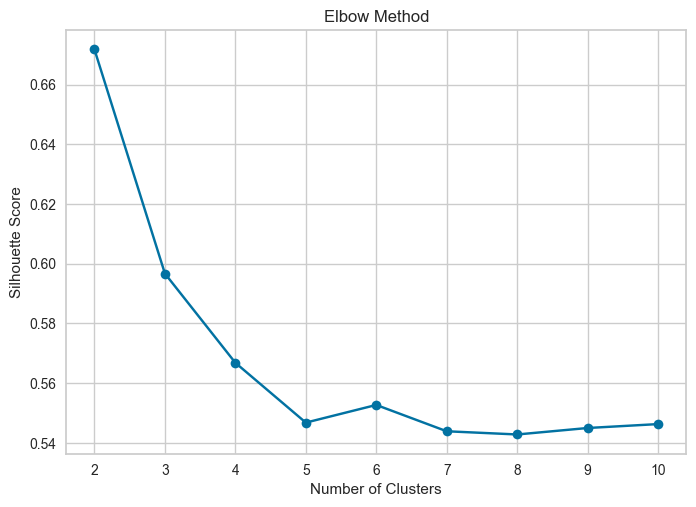

In [231]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


max_clusters = 10

metrics_values = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)  # Substitua 'data' pelo seu conjunto de dados
    metrics_values.append(silhouette_score(data, kmeans.labels_))  # Substitua 'data' pelo seu conjunto de dados

plt.plot(range(2, max_clusters + 1), metrics_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method')
plt.show()


### Distortion Score Elbow for KMeans Clustering

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5054,2589.9748,0.7952,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4589,2106.5636,0.8066,0,0,0


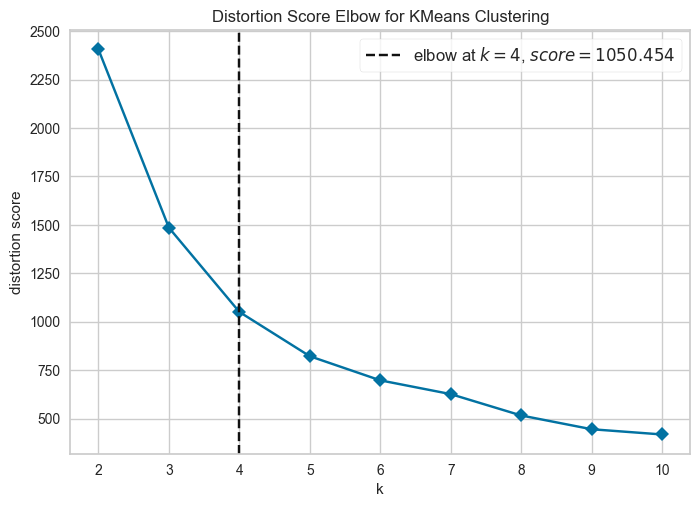

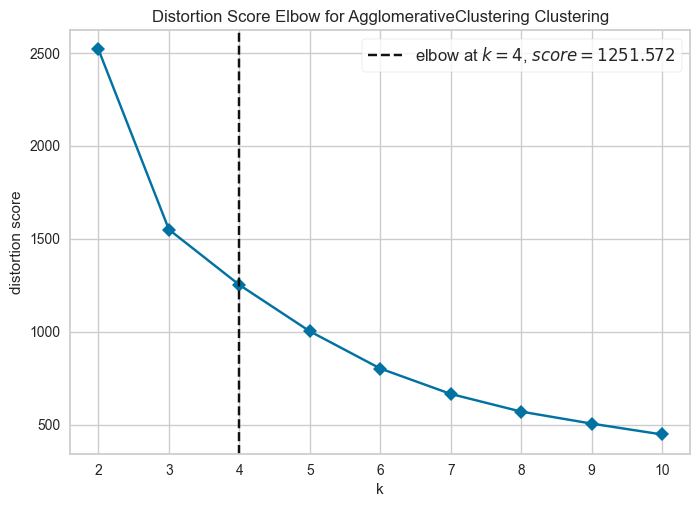

In [233]:
from pycaret.clustering import *

kmeans_model = create_model('kmeans')
hierarchical_model = create_model('hclust')

plot_model(kmeans_model, plot='elbow')
plot_model(hierarchical_model, plot='elbow')



> The results obtained in the graph of "Distortion Score Elbow for KMeans Clustering" indicate that the optimal number of clusters and for the dataset is 4. This is evidenced by the elbow point on the graph, where the distortion score is approximately 1050,454. The elbow is the point where increasing the number of clusters does not result in a significant improvement of the variation explained within the dataset. Therefore, choosing 4 more clusters would not bring significant benefits to the analysis. Cluster.


## 2D Cluster PCA Plot

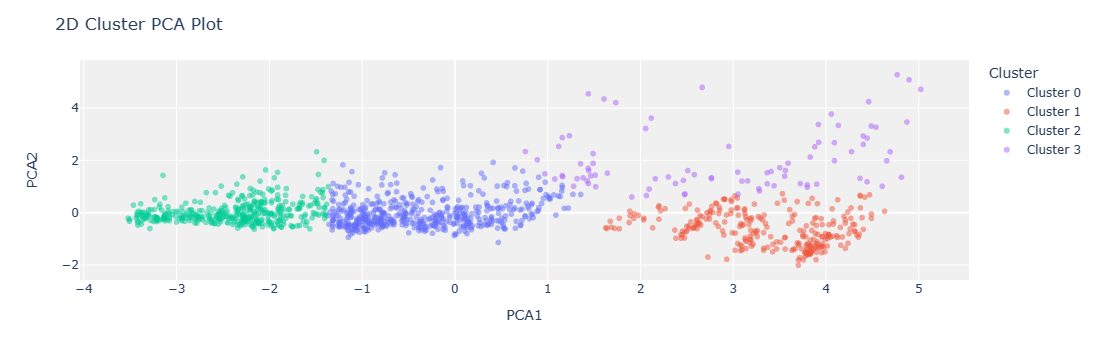

In [235]:
# Criar o scatter plot para o modelo Kmeans
plot_model(kmeans_model, plot='cluster')

### Kmeans model

Red cluster 0: This cluster is dispersed along the PCA1 and IPCA2 axes, indicating significant variation within the group. Green Cluster 1: Appears to be the densest, suggesting that the data in this group are more similar to each other.

Blue cluster 2: It is also spread out, but less intense than cluster 0, showing moderate variation. Purple Cluster 3: Has a similar dispersion to cluster 2, indicating a similar variation. PCA1's axis ranges from negative 4 to plus 5, capturing most of the variation in the data. PCA 2 ranges from minus 2 to plus 4, capturing the second largest variation. The clusters formed by the kmeans model in the PCA graph indicate patterns in the data. Each point represents an observation, and its position is determined by the values of the principal components. The k means model attempts to group the data in such a way that the observations within each cluster are as similar as possible, while the clusters are distinct from each other. This visualization helps you understand the structure of the data and identify natural groupings.

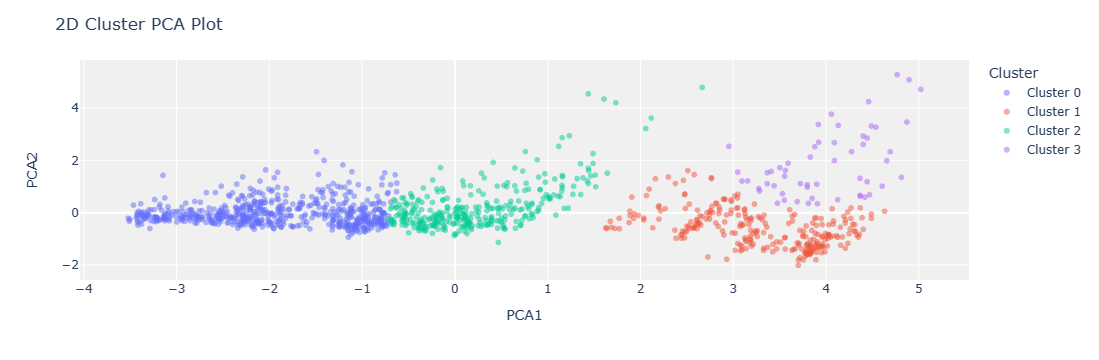

In [236]:
# Criar o scatter plot para o modelo Hhierarchical_clusters
plot_model(hierarchical_model, plot='cluster')

### PCA Carried out with a hierarchical cluster model.

Blue Cluster 0: This cluster has a varying density of points, indicating an internal variance in the data. Cluster, a green one shows a concentration of dots, suggesting that the observations in this group are quite similar to each other. Red Cluster 2: Has a similar point dispersion to cluster 0. Showing an internal variation. Purple Cluster 3: Similar to clusters 0 and 2 in terms of dispersion and point density. PCA shafts: PCA1ranges from -4 to +5. Capturing most of the variation in the data. PCA 2 ranges from minus 2 to plus 4. Capturing the second largest variance. The hierarchical cluster model groups data based on the proximity of observations, forming a hierarchy of clusters, and unlike Kmeans, which creates clusters of similar size, hierarchical clustering can result in clusters of varying sizes. The visualization in the PCA chart helps you identify the structure of the data and understand how the observations are related to each other.

In [237]:

# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

data = pd.read_csv('AAPL5Y.csv', parse_dates=['Date'])

data.set_index('Date', inplace=True)


data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,50.707500,51.235001,50.584999,51.132500,49.225201,77758000
2019-04-23,51.107498,51.937500,50.974998,51.869999,49.935192,93292000
2019-04-24,51.840000,52.119999,51.762501,51.790001,49.858177,70162400
2019-04-25,51.707500,51.939999,51.279999,51.320000,49.405712,74172800
2019-04-26,51.224998,51.250000,50.529999,51.075001,49.169838,74596400


##                 Exploratory Analysis and Descriptive Statistics








### How to identify patterns in Apple stock market prices over time?




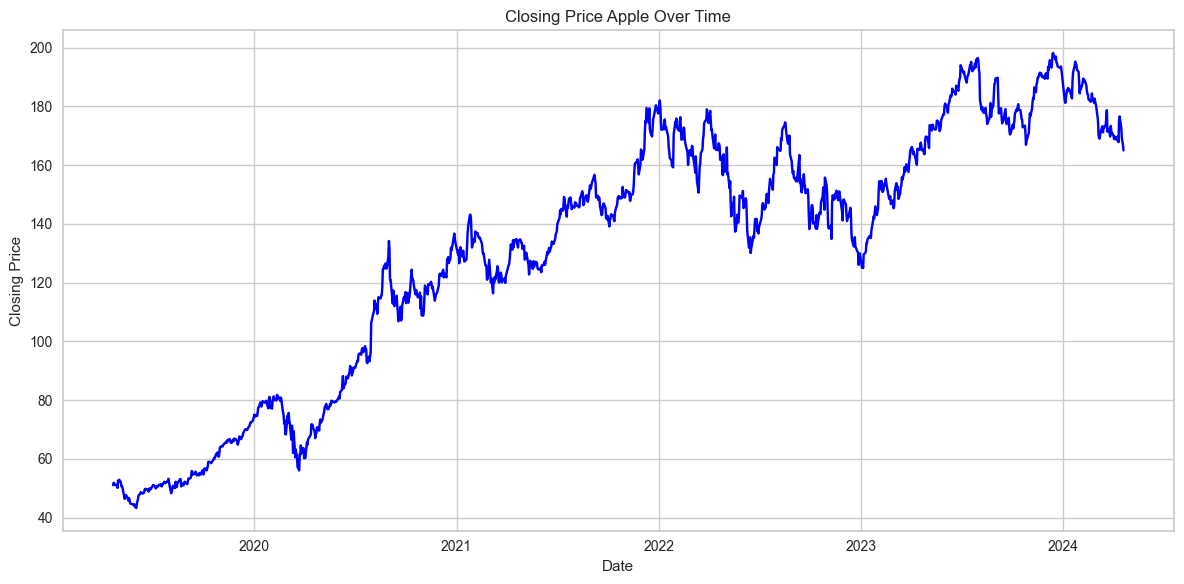

In [239]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title('Closing Price Apple Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### The Analyses of Apple Stock Markets
>It is important to highlight three main aspects: Upward and downward trends, significant price movements, and seasonal or cyclical patterns. The bullish and bearish trends reflect the overall market sentiment towards Apple and its products. Significant price movements, evidenced by sharp peaks and valleys on the chart, can be influenced by various factors such as product announcements, financial reports, and market events. Additionally, the chart may reveal seasonal or cyclical patterns in stock prices, possibly due to the product launch cycle, seasonality in sales, or fluctuations in global markets. Analyzing these price patterns is crucial for making informed decisions in the stock market and developing effective investment strategies.

### 2- How can statistics be applied to calculate the average return and standard deviation of Apple stock prices over a given period of time?

In [240]:
daily_return = data["Close"].pct_change().dropna()
data.drop('Adj Close', axis=1, inplace=True)
daily_return.head

<bound method NDFrame.head of Date
2019-04-23    0.014423
2019-04-24   -0.001542
2019-04-25   -0.009075
2019-04-26   -0.004774
2019-04-29    0.001517
                ...   
2024-04-15   -0.021864
2024-04-16   -0.019167
2024-04-17   -0.008147
2024-04-18   -0.005714
2024-04-19   -0.012213
Name: Close, Length: 1258, dtype: float64>

In [241]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-22,50.707500,51.235001,50.584999,51.132500,77758000
2019-04-23,51.107498,51.937500,50.974998,51.869999,93292000
2019-04-24,51.840000,52.119999,51.762501,51.790001,70162400
2019-04-25,51.707500,51.939999,51.279999,51.320000,74172800
2019-04-26,51.224998,51.250000,50.529999,51.075001,74596400


In [242]:
data = pd.merge(data, daily_return, how = 'inner', on = 'Date')
data.columns = ['Open','High','Low','Close','Volume','Daily_Variation']
data.head()

,Open,High,Low,Close,Volume,Daily_Variation
Date,,,,,,
2019-04-23,51.107498,51.937500,50.974998,51.869999,93292000,0.014423
2019-04-24,51.840000,52.119999,51.762501,51.790001,70162400,-0.001542
2019-04-25,51.707500,51.939999,51.279999,51.320000,74172800,-0.009075
2019-04-26,51.224998,51.250000,50.529999,51.075001,74596400,-0.004774
2019-04-29,51.099998,51.492500,50.965000,51.152500,88818800,0.001517


In [243]:
data.shape

(1258, 6)

In [244]:
data.describe()

,Open,High,Low,Close,Volume,Daily_Variation
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,131.104122,132.579881,129.729189,131.223027,9.794036e+07,0.001133
std,43.743312,44.077763,43.396311,43.750453,5.211222e+07,0.020063
min,43.860001,44.480000,42.567501,43.325001,2.404830e+07,-0.128647
25%,96.453752,97.174374,94.843126,96.224376,6.452845e+07,-0.008491
50%,142.504997,144.275002,140.639999,142.644996,8.470835e+07,0.000700
75%,168.012504,169.399997,166.060005,167.437496,1.144590e+08,0.012291
max,198.020004,199.619995,197.000000,198.110001,4.265100e+08,0.119808


In [245]:
daily_return_mean = np.mean(daily_return)

In [246]:
deviation_daily_return = np.std(daily_return)

In [247]:
print("Average Closing Return:", daily_return_mean)
print("Closing Standard Deviation:", deviation_daily_return)

Average Closing Return: 0.001132738703616525
Closing Standard Deviation: 0.020055020017032264


In [248]:
# Mean and standard deviation consideering 5 years closing
print("Average Annual Closing Return:", (1 + daily_return_mean) ** 252 - 1)
print("Closing Annual Standard Deviation:", deviation_daily_return*np.sqrt(252))

Average Annual Closing Return: 0.3301458595781215
Closing Annual Standard Deviation: 0.3183635730209383


In [249]:
# Preço inicial da ação da Apple (há 5 anos)
inicial_price = 51.869999

# Preço final da ação da Apple (atual)
end_price = 165.000000

# Calcular o retorno percentual
percentual_return = ((end_price - inicial_price) / inicial_price) * 100

print("percentual return in 5 years:", percentual_return, "%")


percentual return in 5 years: 218.10295581459332 %


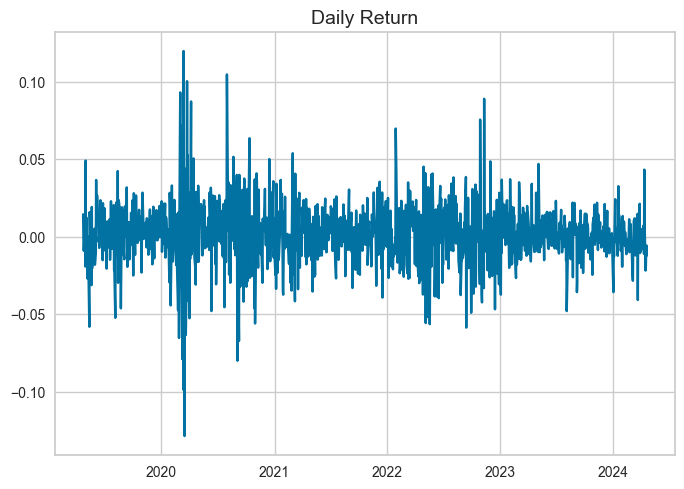

In [250]:
# Plot
plt.plot(daily_return)
plt.title("Daily Return", size = 14)
plt.show()

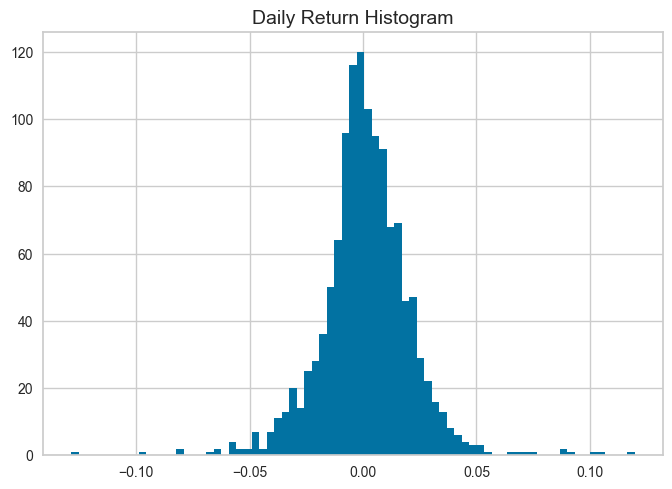

In [251]:
plt.hist(daily_return, bins = 75)
plt.title("Daily Return Histogram", size = 14)
plt.show()

In [252]:
#Variance Level
var_level = 95
var = np.percentile(daily_return, 100 - var_level)
print("Certainty that daily losses will not exceed VaR% on a given day based on historical values.")
print("VAR 95%:", var)

Certainty that daily losses will not exceed VaR% on a given day based on historical values.
VAR 95%: -0.03075345833668226


>An analysis of the average return and standard deviation of Apple's stock prices over a 5-year period has been done and the result indicates that with a 95% confidence, the VaR is -0.03075. This means that there is 95% certainty that the daily losses did not exceed negative 0.03075 on a given day, based on historical values.

>In simpler terms, the VaR 95% of -0.03075 indicates that there is a 95% probability that the daily losses will not exceed -0.03065, i.e., a loss of 3.075% on a specific day, based on historical stock price fluctuations. This provides an estimate of the risk of losses at a given level of confidence for investors.









### Ploting Time series, ACF and PACF

In [253]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

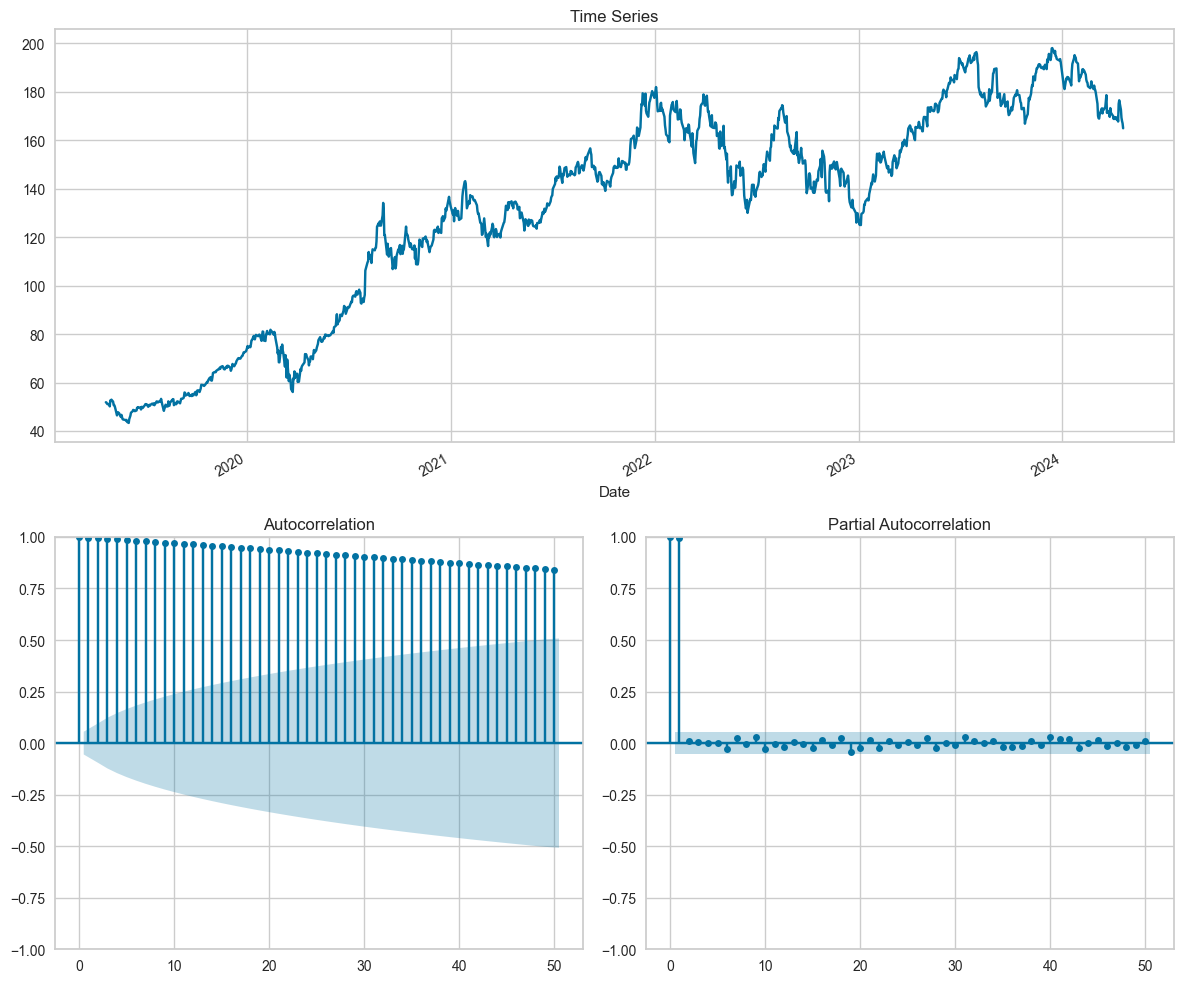

In [254]:
plotds(data['Close'], nlag = 100)

## > Time series.

Top chart shows the time series of Apple's closing prices over time, represented on the x-axis by the date and on the y-axis by the closing price. We can observe that closing prices have increased over time, but there have also been significant fluctuations, indicating volatility in the market.

## >Autocorrelation.

The bottom left chart is the autocorrelation chart, which shows the correlation between past time series values. Each bar represents the correlation between the current time series and the time series for a given number of previous periods (lags). On the x-axis we have the delays and on the y-axis the correlation. If a bar is above the blue dotted line it indicates a positive correlation, while if it is below it indicates a negative correlation. We can observe that there is a high significant correlation in several previous lags, which suggests that the past values of the time series have an influence on the future values.

## >Partial autocorrelation.

The bottom right graph is the partial autocorrelation plot, which shows the correlation between the current time series and the time series at a given lag, controlling for the effects of intermediate lags. This helps to identify the direct correlation between two observations, excluding the influence of intermediate observations. I observed that there is a significant high correlation between lag 1 and some other lags, which suggests that the immediately preceding values have a direct influence on future values.

In [255]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(data['Close'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.67396813617931
p-value: 0.4445723065700366


### Realizing the ADF test

In [258]:

dados_temporais = data['Close']


resultado_adf = adfuller(dados_temporais)

adf_statistica = resultado_adf[0]
p_valor = resultado_adf[1]
valores_criticos = resultado_adf[4]

print("Estatística ADF:", adf_statistica)
print("Valor p:", p_valor)
print("Valores críticos:")
for chave, valor in valores_criticos.items():
    print(f"  {chave}: {valor}")


Estatística ADF: -1.67396813617931
Valor p: 0.4445723065700366
Valores críticos:
  1%: -3.4355629707955395
  5%: -2.863842063387667
  10%: -2.567995644141416


* The statistics of the ADF test (-1.6859530850644313) are higher than the critical values for all confidence levels (1%5% and 10%). Also, the p-value (0.4383640144091566) is greater than 0.05. Therefore, I don't have enough evidence to reject the null hypothesis that the time series is non-stationary. This suggests that Apple's closing stock prices may be non-stationary based on the ADF test result.

### Time Series Decomposition

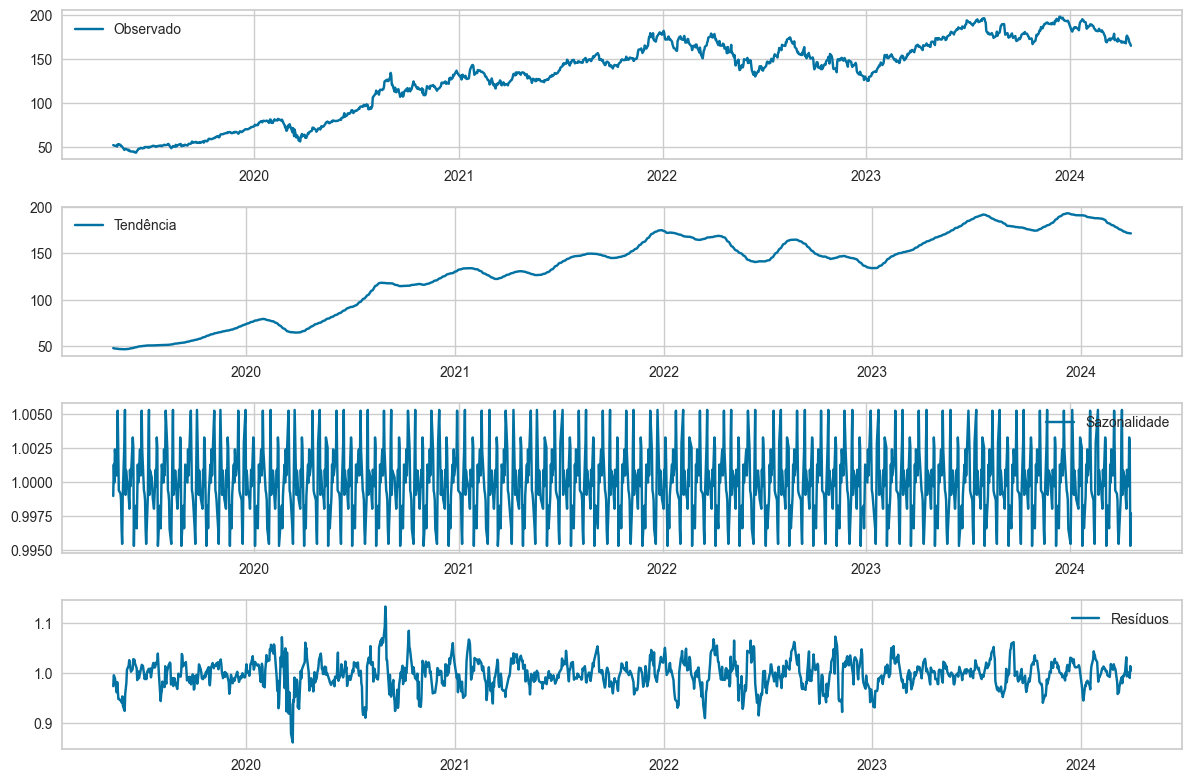

In [259]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='multiplicative', period=30)  # Period define a periodicidade esperada

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data.index, result.observed, label='Observado')
plt.legend()

plt.subplot(412)
plt.plot(data.index, result.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(data.index, result.seasonal, label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(data.index, result.resid, label='Resíduos')
plt.legend()

plt.tight_layout()
plt.show()


>The 4 time series decomposition charts provide important insights into the structure of the data.

#### Observed:
Shows the original time series, highlighting trends, seasonality, and irregular variations over time.

#### Trend: 
Reveals the general direction of the time series, such as the increase or decrease over time.

#### Seasonality: 
Indicates repeating patterns that occur at fixed intervals of time, such as daily, weekly, or yearly seasonalities.

#### Residuals: 
Represents the variations. Irregular, not explained by trend or seasonality, functioning as a remaining noise in the time series.

>This decomposition is valuable for understanding and modeling the time series, helping to identify patterns and behaviors that can be useful in predicting future values.

In [260]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('AAPL5Y.csv')

model = ARIMA(data['Close'], order=(3, 1, 15))
model_fit = model.fit()

forecast = model_fit.forecast(steps=10) 

print(forecast)  

1259    165.769735
1260    165.452831
1261    165.570521
1262    165.310914
1263    165.456315
1264    165.465136
1265    165.553939
1266    165.785562
1267    165.328783
1268    164.971608
Name: predicted_mean, dtype: float64


## Conclusion

Based on the results obtained from this comprehensive analysis of Apple's stock prices, I was able to draw several important conclusions about the patterns of variation, trends, and seasonality over time. 

Firstly, exploratory analysis of the data revealed upward trends in Apple's stock prices. Indicating an overall increase in the value of the shares of 218% over the analyzed period. In addition, seasonal patterns and market cycles were identified that influenced price movements, reflecting the product launch cycle and seasonal fluctuations in sales. Anomaly detection also provided valuable insights into what may have impacted stock prices, such as unexpected product announcements and financial reports. 

By applying machine learning techniques like clustering, we can segment the data into distinct groups and develop accurate prediction models. Clustering algorithms have identified natural groupings in the data, providing a deeper understanding of the underlying structure of stock prices. In turn, the ARIMA model demonstrated its ability to capture patterns of variation and predict future movements of the stock price, highlighting its effectiveness as a forecasting tool. 

Importantly, this study contributes significantly to the understanding of the stock market and informed decision-making in the field of investing. The analyses carried out offer valuable insights for those who operate in the financial market, allowing a better understanding of the patterns of variation in stock prices and facilitating the formulation of more effective investment strategies. 

It is important to recognize the limitations of this study, while I have explored a variety of analytical techniques and forecasting models, there is always room for improvement and refinement, as well as developing more advanced machine learning models for stock price prediction. 

Ultimately, this work represented a significant step forward in understanding Apple's stock prices and highlights the potential of advanced analytical techniques to inform investment decisions and drive financial success. 